In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

year_example = 2019

# Test on one year

In [2]:
df = pd.read_csv('../original_data/state_TX_'+str(year_example)+'.csv')
df.head()

C:\Users\asent\AppData\Local\Temp\ipykernel_14168\978427623.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../original_data/state_TX_'+str(year_example)+'.csv')


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2019,254900VHUBSJJKOMBF27,21340,TX,48141.0,4.814101e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,29238,90.83,50200,129,6543,8131,8
1,2019,254900VHUBSJJKOMBF27,26420,TX,48339.0,4.833969e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,6540,25.28,77100,155,1753,2042,11
2,2019,254900VHUBSJJKOMBF27,26420,TX,48201.0,4.820125e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7698,63.51,77100,89,1760,2344,31
3,2019,254900VHUBSJJKOMBF27,21340,TX,48141.0,4.814101e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4027,97.69,50200,55,759,1111,25
4,2019,254900VHUBSJJKOMBF27,41700,TX,48029.0,4.802915e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,5253,94.86,71000,51,964,1728,67


In [3]:
def rename_race_data(df):
    # Rename specific categories
    new_df = df.copy()
    new_df['derived_race'] = df['derived_race'].replace({
        'American Indian or Alaska Native' : "American Indian",
        'Black or African American': 'African American',
        '2 or more minority races' : "Others",
        'Native Hawaiian or Other Pacific Islander': 'Others',
        'Joint': 'Race Not Available',
        'Free Form Text Only': 'Race Not Available'  
    })
    return new_df

def preprocess_race_data(df):
    df_filtered = df[df['derived_race'] != 'Race Not Available']
    return df_filtered
df = rename_race_data(df)
# df_race_processed = preprocess_race_data(df)

In [4]:
race_counts = df.groupby('derived_race')["derived_race"].count()

approved_counts = df[df['action_taken'] == 1]['derived_race'].value_counts()

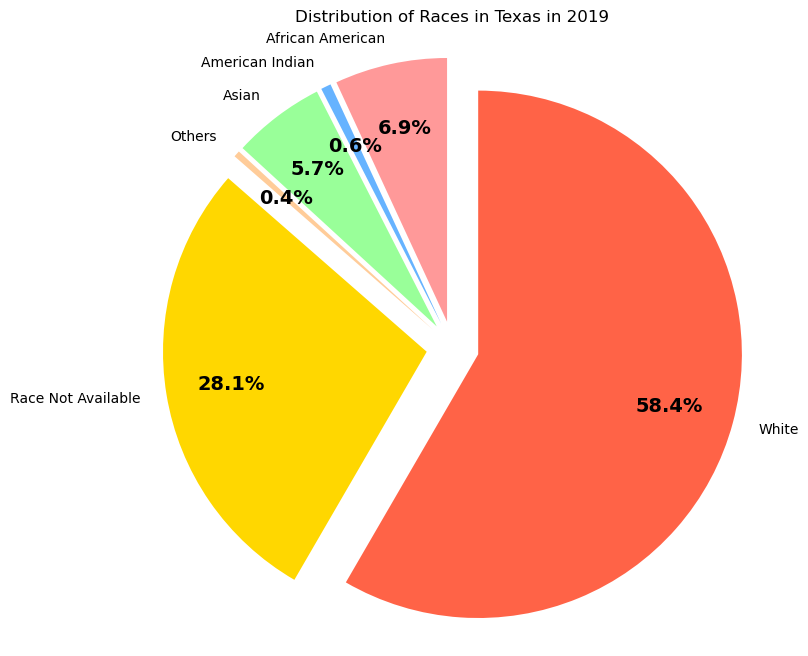

In [5]:
def create_pie_chart(race_counts, title):
    # Créer le diagramme en camembert avec des parts coupées
    plt.figure(figsize=(8, 8))
    
    # Définir les couleurs personnalisées pour chaque part
    colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#8A2BE2']  # Liste de couleurs variées
    explode = [0.1] * len(race_counts)  # Décaler toutes les parts
    
    wedges, texts, autotexts = plt.pie(
        race_counts,
        labels=race_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(race_counts)],  # Assurer que le nombre de couleurs corresponde au nombre de catégories
        pctdistance=0.75,  # Position des pourcentages
        labeldistance=1.1  # Position des labels
    )
    
    # Mettre les pourcentages en noir et en gras
    for text in autotexts:
        text.set_fontsize(14)
        text.set_color('black')  # Couleur du texte en noir
        text.set_weight('bold')   # Mettre en gras
    
    plt.title(title)
    plt.axis('equal')  # Égaliser les axes pour un camembert circulaire
    plt.show()

# Exemple d'appel de la fonction
create_pie_chart(race_counts, title=f'Distribution of Races in Texas in {year_example}')


In [6]:
def create_table_count(race_counts):
    race_counts_df = race_counts.reset_index(name='Count')

    race_counts_df.columns = ['Race', 'Count']
    
    total_count = race_counts_df['Count'].sum()
    race_counts_df['Percentage'] = round((race_counts_df['Count'] / total_count) * 100,2)
    race_counts_df['Percentage'] = race_counts_df['Percentage'].astype(str) + '%'


    print(tabulate(race_counts_df, headers='keys', tablefmt='fancy_grid'))
    pass

create_table_count(race_counts)

╒════╤════════════════════╤═════════╤══════════════╕
│    │ Race               │   Count │ Percentage   │
╞════╪════════════════════╪═════════╪══════════════╡
│  0 │ African American   │   90396 │ 6.89%        │
├────┼────────────────────┼─────────┼──────────────┤
│  1 │ American Indian    │    8102 │ 0.62%        │
├────┼────────────────────┼─────────┼──────────────┤
│  2 │ Asian              │   74273 │ 5.66%        │
├────┼────────────────────┼─────────┼──────────────┤
│  3 │ Others             │    5106 │ 0.39%        │
├────┼────────────────────┼─────────┼──────────────┤
│  4 │ Race Not Available │  367990 │ 28.07%       │
├────┼────────────────────┼─────────┼──────────────┤
│  5 │ White              │  765278 │ 58.37%       │
╘════╧════════════════════╧═════════╧══════════════╛


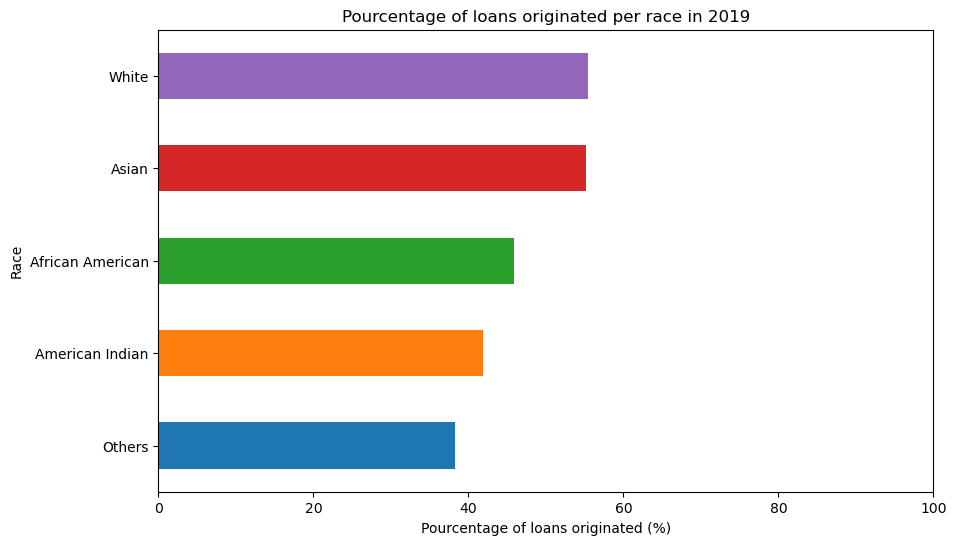

In [7]:
def create_bar_chart_loan_per_race(total_approved_counts, total_race_counts, title='between 2018 and 2023'):
  
  total_approved_counts = total_approved_counts.drop('Race Not Available')
  total_race_counts = total_race_counts.drop('Race Not Available')
  
  percentages = (total_approved_counts / total_race_counts) * 100

  plt.figure(figsize=(10, 6))
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
  percentages.sort_values().plot(kind='barh', color=colors)

  plt.xlabel('Pourcentage of loans originated (%)')
  plt.ylabel('Race')
  plt.title('Pourcentage of loans originated per race '+ title)
  plt.xlim(0, 100)

  plt.show()
  pass

create_bar_chart_loan_per_race(approved_counts, race_counts, title='in 2019')

# Analysis for All years

C:\Users\asent\AppData\Local\Temp\ipykernel_14168\2054535040.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../original_data/state_TX_'+str(i)+'.csv')
C:\Users\asent\AppData\Local\Temp\ipykernel_14168\2054535040.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../original_data/state_TX_'+str(i)+'.csv')
C:\Users\asent\AppData\Local\Temp\ipykernel_14168\2054535040.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../original_data/state_TX_'+str(i)+'.csv')
C:\Users\asent\AppData\Local\Temp\ipykernel_14168\2054535040.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Spe

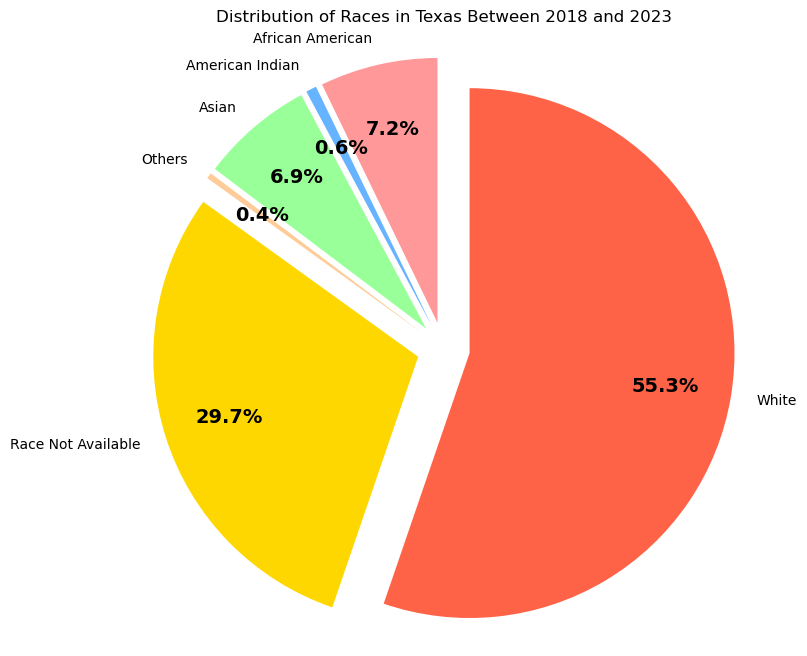

╒════╤════════════════════╤══════════════════╤══════════════╕
│    │ Race               │            Count │ Percentage   │
╞════╪════════════════════╪══════════════════╪══════════════╡
│  0 │ African American   │ 637556           │ 7.18%        │
├────┼────────────────────┼──────────────────┼──────────────┤
│  1 │ American Indian    │  57348           │ 0.65%        │
├────┼────────────────────┼──────────────────┼──────────────┤
│  2 │ Asian              │ 610805           │ 6.88%        │
├────┼────────────────────┼──────────────────┼──────────────┤
│  3 │ Others             │  31529           │ 0.36%        │
├────┼────────────────────┼──────────────────┼──────────────┤
│  4 │ Race Not Available │      2.63642e+06 │ 29.69%       │
├────┼────────────────────┼──────────────────┼──────────────┤
│  5 │ White              │      4.907e+06   │ 55.25%       │
╘════╧════════════════════╧══════════════════╧══════════════╛


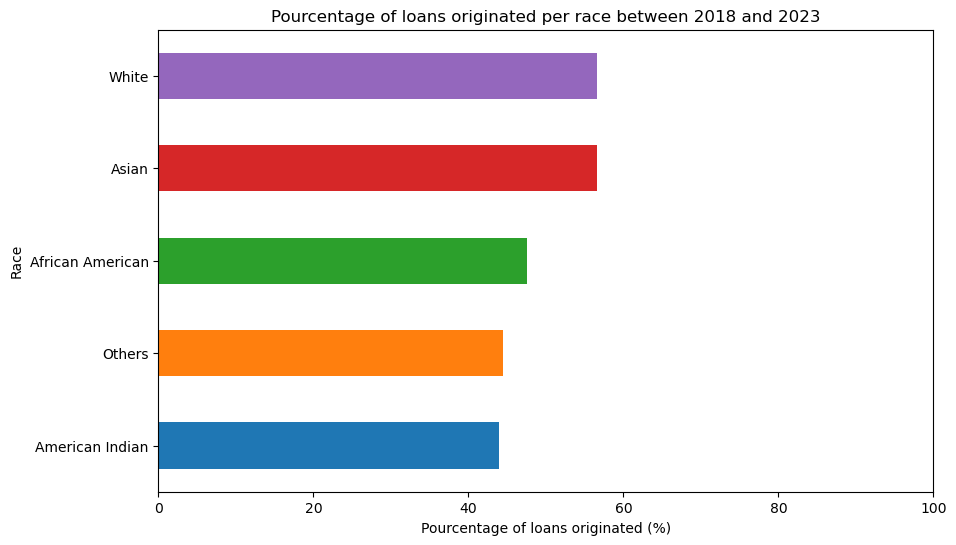

In [8]:
total_race_counts = pd.Series(dtype=int)
total_approved_counts = pd.Series(dtype=int)

for i in range(2018, 2024):
    df = pd.read_csv('../original_data/state_TX_'+str(i)+'.csv')
    df = rename_race_data(df)
    race_counts     = df['derived_race'].value_counts()
    approved_counts = df[df['action_taken'] == 1]['derived_race'].value_counts()
    
    # Accumuler les comptes totaux de prêts et prêts approuvés
    total_approved_counts = total_approved_counts.add(approved_counts, fill_value=0)
    total_race_counts = total_race_counts.add(race_counts, fill_value=0)

create_pie_chart(total_race_counts, title=f'Distribution of Races in Texas Between 2018 and 2023')
create_table_count(total_race_counts)
create_bar_chart_loan_per_race(total_approved_counts, total_race_counts, title='between 2018 and 2023')
